<a href="https://colab.research.google.com/github/PedroMarcusso09/Calculadora-de-Aluguel-/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa: Calculadora de Aluguel - Machine Learning

In [139]:
# Bibliotecas
import pandas as pd

In [140]:
import pandas as pd
df = pd.read_csv('/content/dados_tratados_ml (7).csv')
df.head()

,zonas,enderecos,precos,area,quarto
0,norte,"Vila Primavera, São Paulo Zona Norte, São Paulo",1200,58.0,2.0
1,norte,"Jardim São Paulo, São Paulo Zona Norte, São Paulo",3100,186.0,3.0
2,norte,"Vila Primavera, São Paulo Zona Norte, São Paulo",3300,80.0,3.0
3,norte,"Mandaqui, São Paulo Zona Norte, São Paulo",1550,50.0,2.0
4,norte,"Vila Primavera, São Paulo Zona Norte, São Paulo",1200,56.0,2.0


In [141]:
df = df.drop(columns=['enderecos'])
df.head()

,zonas,precos,area,quarto
0,norte,1200,58.0,2.0
1,norte,3100,186.0,3.0
2,norte,3300,80.0,3.0
3,norte,1550,50.0,2.0
4,norte,1200,56.0,2.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zonas   960 non-null    object 
 1   precos  960 non-null    int64  
 2   area    960 non-null    float64
 3   quarto  943 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.1+ KB


In [143]:
# Análise Estatistica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,960.0,9238.151042,126386.630621,500.0,1600.0,2400.0,3900.0,3750000.0
area,960.0,80.179167,56.911665,20.0,49.0,62.0,86.0,500.0
quarto,943.0,2.137858,0.808710,1.0,2.0,2.0,3.0,5.0


# Base de treino

In [144]:
# Divisão dos dados para treino e teste
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, stratify=df['zonas'], test_size=0.25,  random_state=42)                                                                                       

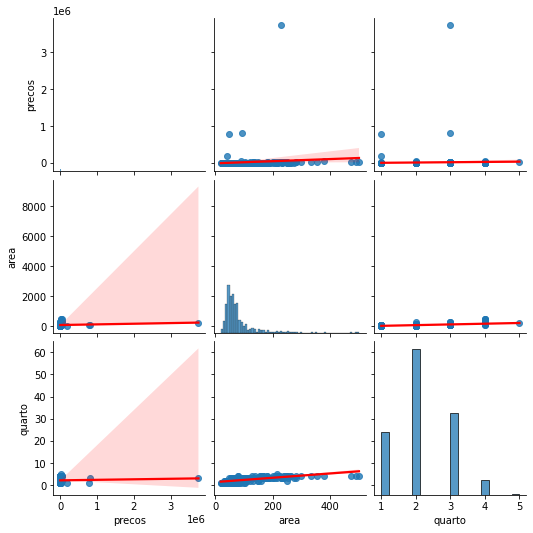

In [145]:
import seaborn as sns
sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'red'}})

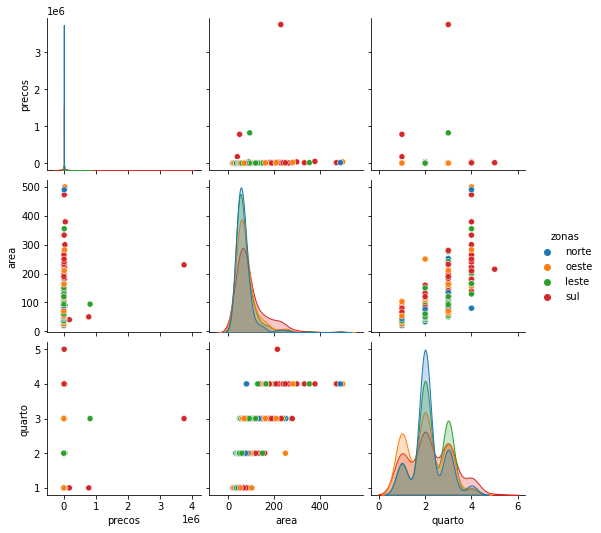

In [146]:
sns.pairplot(treino, hue='zonas')

In [147]:
num_cols = ['quarto', 'area', 'precos']
treino_num = treino[num_cols]

In [148]:
# Preencher os dados
treino_medianas = treino_num.median()
treino_num = treino_num.fillna(treino_medianas)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 77 to 745
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   quarto  720 non-null    float64
 1   area    720 non-null    float64
 2   precos  720 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 38.7 KB


In [149]:
# Aplicar log nos dados
import numpy as np
treino_num=treino_num.apply(np.log1p)

In [150]:
treino[num_cols] = treino_num

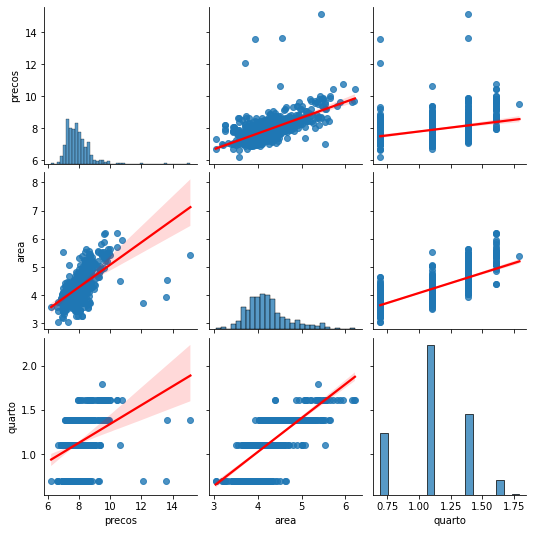

In [151]:
sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'red'}})

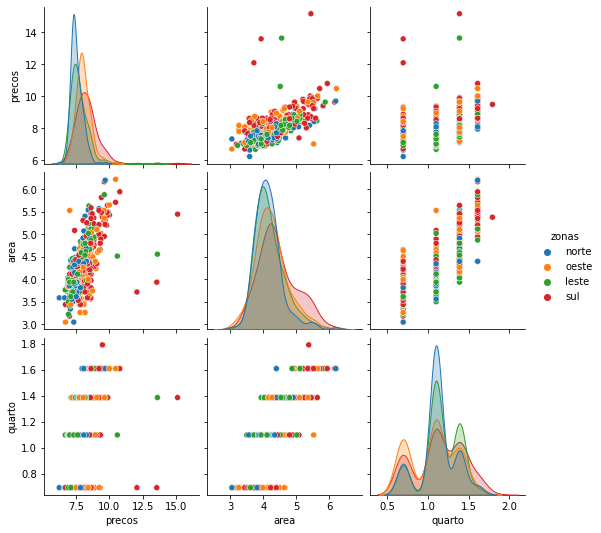

In [152]:
sns.pairplot(treino, hue='zonas')

In [153]:
# Remoção de outliers

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
  treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quarto,area,precos
77,1.386294,4.290459,8.268988
821,1.098612,4.262680,7.824446
55,1.386294,4.510860,7.601402
540,1.098612,4.110874,7.696667
164,1.098612,4.025352,7.003974
...,...,...,...
85,1.098612,3.891820,7.346655
487,1.098612,3.931826,7.313887
894,0.693147,3.988984,8.400884
630,1.098612,4.110874,7.601402


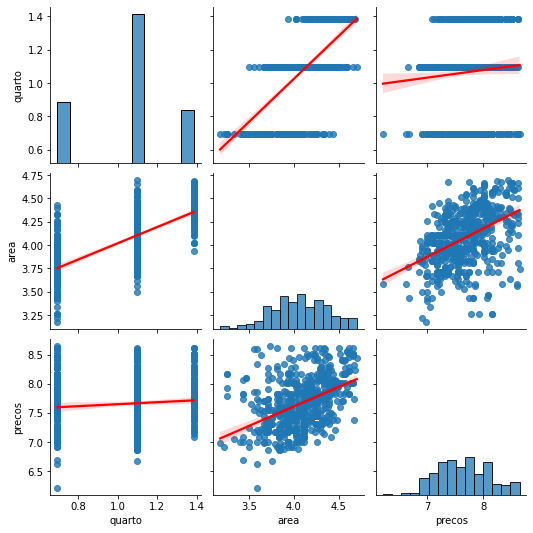

In [154]:
sns.pairplot(treino_num_sem_outlier, kind='reg', plot_kws={'line_kws':{'color':'red'}})

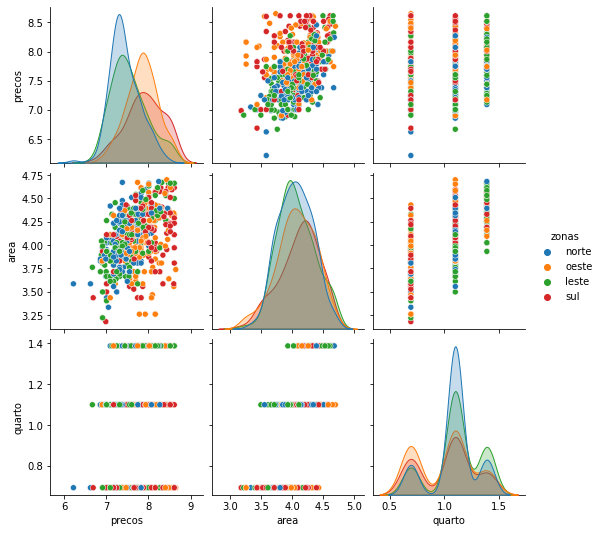

In [155]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zonas')

In [156]:
cat_cols = ['zonas']
treino_cat = treino[cat_cols]

In [157]:
# Vantagem de get_dummies: Lida automaticamente com NaNs (todos zeros)
treino_cat = pd.get_dummies(treino_cat)

In [158]:
treino = pd.concat([treino_cat, treino.drop(cat_cols, axis=1)], axis=1)

In [159]:
treino.head()

,zonas_leste,zonas_norte,zonas_oeste,zonas_sul,precos,area,quarto
77,0,1,0,0,8.268988,4.290459,1.386294
821,0,0,1,0,7.824446,4.262680,1.098612
55,0,1,0,0,7.601402,4.510860,1.386294
540,1,0,0,0,7.696667,4.110874,1.098612
164,0,1,0,0,7.003974,4.025352,1.098612


# Base de teste

In [160]:
# Preencher NaN 
# Importante: NUNCA usar informações do conjunto de testes, por isso estamos usando as medianas do conjunto de treino
teste = teste.fillna(treino_medianas)
teste.head()

,zonas,precos,area,quarto
152,norte,1300,39.0,1.0
89,norte,2000,60.0,3.0
372,sul,4600,85.0,2.0
530,leste,3300,77.0,2.0
927,oeste,3500,65.0,2.0


In [161]:
# Aplicar log nos valores numericos
teste[num_cols] = teste[num_cols].apply(np.log1p)
teste.head()

,zonas,precos,area,quarto
152,norte,7.170888,3.688879,0.693147
89,norte,7.601402,4.110874,1.386294
372,sul,8.434029,4.454347,1.098612
530,leste,8.101981,4.356709,1.098612
927,oeste,8.160804,4.189655,1.098612


In [162]:
# One-Hot Encoding
teste_onehot = pd.get_dummies(teste[cat_cols])
teste=pd.concat([teste_onehot, teste[num_cols]], axis=1)
teste.head()

,zonas_leste,zonas_norte,zonas_oeste,zonas_sul,quarto,area,precos
152,0,1,0,0,0.693147,3.688879,7.170888
89,0,1,0,0,1.386294,4.110874,7.601402
372,0,0,0,1,1.098612,4.454347,8.434029
530,1,0,0,0,1.098612,4.356709,8.101981
927,0,0,1,0,1.098612,4.189655,8.160804


In [163]:
treino.to_csv('treino_preprocessado.csv', index=False)
teste.to_csv('teste_preprocessado.csv', index=False)

# Machine Learning

In [164]:
import pandas as pd 
treino = pd.read_csv('/content/treino_preprocessado.csv') 
teste = pd.read_csv('/content/teste_preprocessado.csv')

In [165]:
# Divisão X e y
X_train = treino.drop('precos', axis=1)
y_train = treino['precos']
X_test = teste.drop('precos', axis=1)
y_test = teste['precos']

In [166]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


-66.79230149840235

# Modelos de Machine Learning

In [167]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [168]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


-0.6671908172292933

In [169]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


-1.1781068384975137

In [174]:
regr = AdaBoostRegressor()
regr.fit(X_train, y_train)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',  n_estimators=50, random_state=None)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


-0.10635245541697058